Used to explore metadata of mp3 files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("metadata_22.csv")
print(df.head())
df_21 = pd.read_csv("earnings21-file-metadata.csv")
print(df_21.head())

   File ID Ticker Symbol Country by Ticker                   UN Defined  \
0  4468679           PAM         Argentina  Latin America and Caribbean   
1  4468919          LOMA         Argentina  Latin America and Caribbean   
2  4469528         CRESY         Argentina  Latin America and Caribbean   
3  4470290          DESP         Argentina  Latin America and Caribbean   
4  4470595          SUPV         Argentina  Latin America and Caribbean   

  Major Dialect Family Language Family + Area Based  File Length (seconds)  \
0                Other           Spanish/Portuguese                   3300   
1                Other           Spanish/Portuguese                   1214   
2                Other           Spanish/Portuguese                   1671   
3                Other           Spanish/Portuguese                   1627   
4                Other           Spanish/Portuguese                   3961   

   Sampling Rate (Hz)  
0               16000  
1               22050  
2       

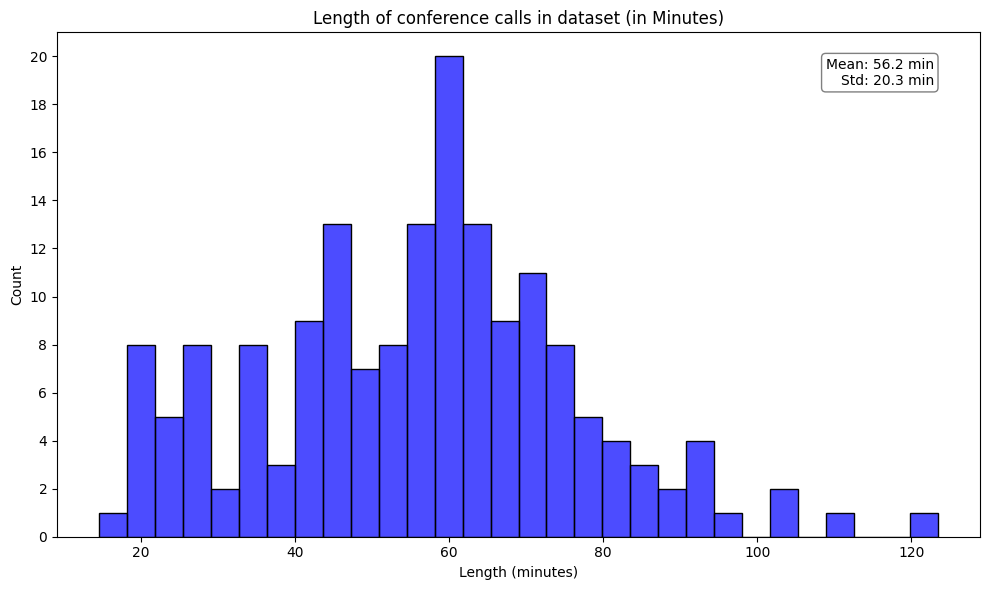

In [5]:
file_lengths_minutes = (df["File Length (seconds)"] / 60).tolist()
audio_lengths_minutes = (df_21["audio_length"] / 60).tolist()
all_lengths = file_lengths_minutes + audio_lengths_minutes

mean_length = np.mean(all_lengths)
std_length = np.std(all_lengths)  # in minutes

plt.figure(figsize=(10, 6))
sns.histplot(all_lengths, bins=30, color="blue", alpha=0.7)
plt.title("Length of conference calls in dataset (in Minutes)")
plt.xlabel("Length (minutes)")
plt.ylabel("Count")

# Ensure y-axis has only integer tick marks
max_count = plt.gca().get_ylim()[1]
plt.yticks(np.arange(0, int(max_count) + 1, 2))

# Add mean and variance in the upper right corner
plt.text(
    0.95, 0.95,
    f"Mean: {mean_length:.1f} min\nStd: {std_length:.1f} min",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray')
)

plt.tight_layout()
plt.show()


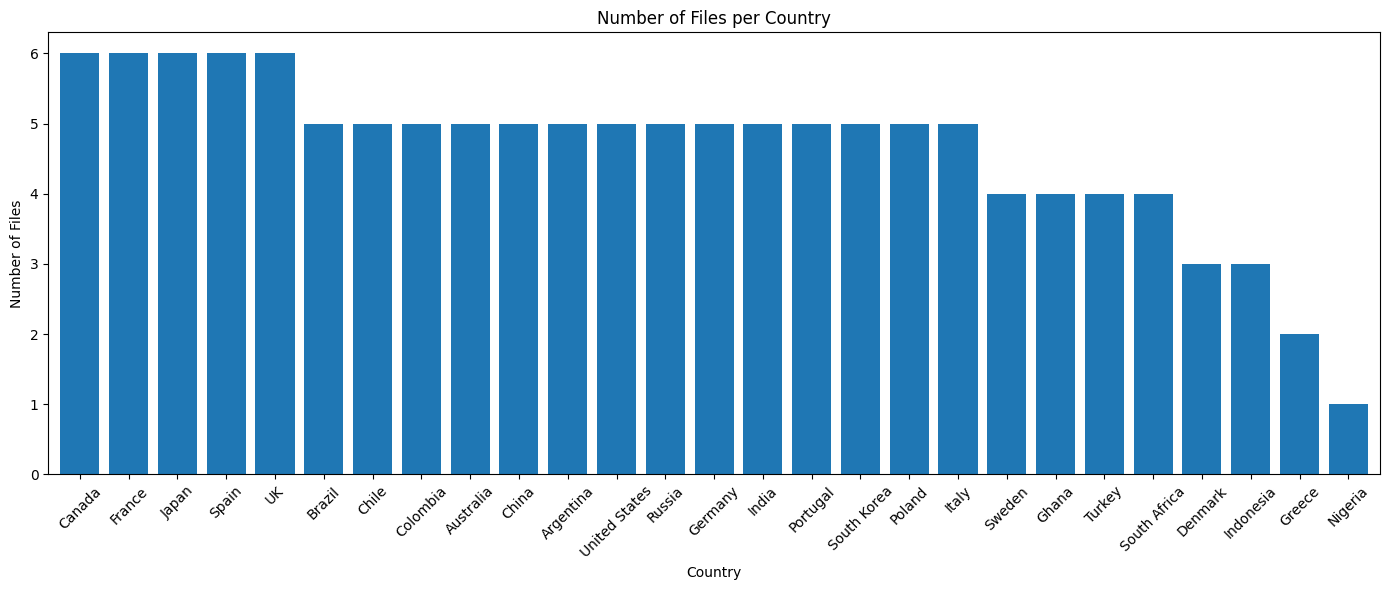

In [ ]:
plt.figure(figsize=(14, 6)) 
df["Country by Ticker"].value_counts().plot(kind="bar", width=0.8)
plt.title("Number of Files per Country")
plt.ylabel("Number of Files")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


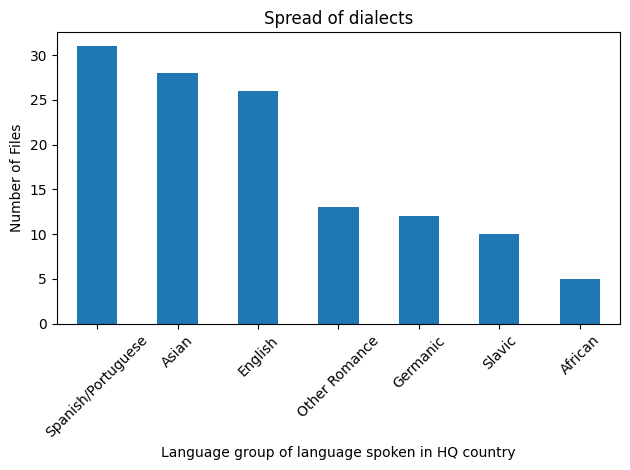

In [43]:
df["Language Family + Area Based"].value_counts().plot(kind="bar")
plt.title("Spread of dialects")
plt.ylabel("Number of Files")
plt.xlabel("Language group of language spoken in HQ country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


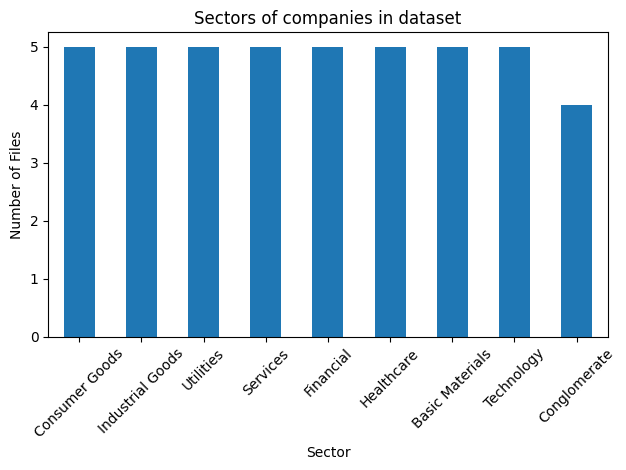

In [47]:
df_21["sector"].value_counts().plot(kind="bar")
plt.title("Sectors of companies in dataset")
plt.ylabel("Number of Files")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
